In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

import keras

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
tf.__version__

'2.13.0'

### 퍼셉트론

- TLU : 입력의 가중치 합을 계산한 다음 계단 함수를 적용하는 인공 뉴런

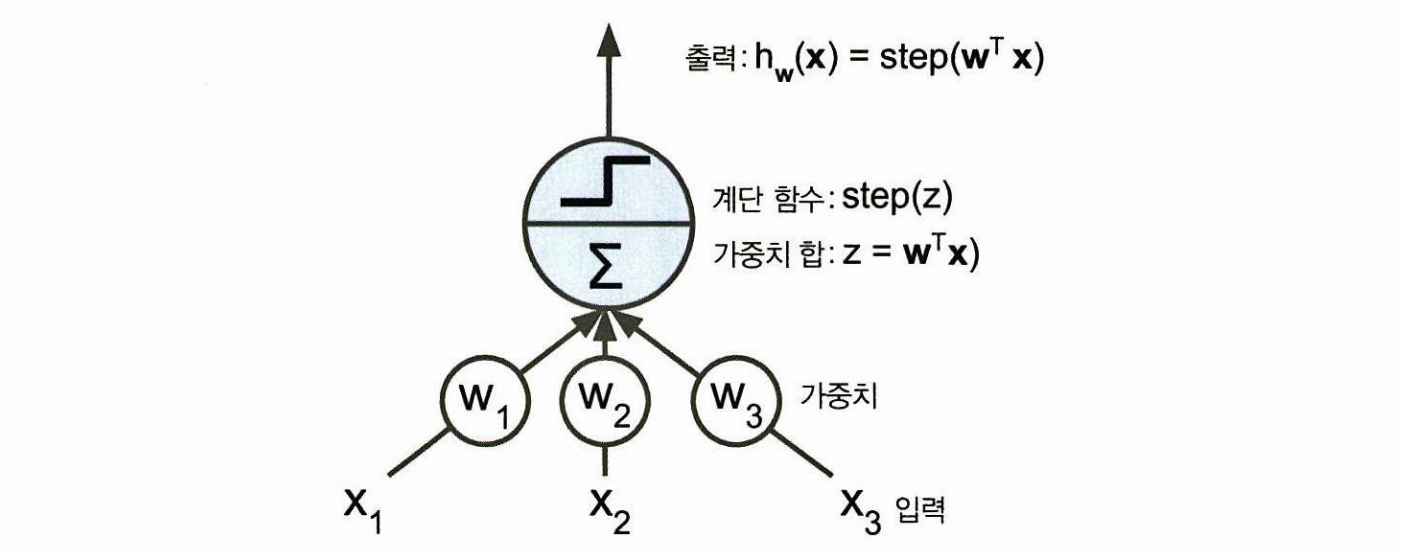

- 입력 뉴런 2개, 편향 뉴런 1개, 출력 뉴런 3개로 구성된 퍼셉트론의 구조

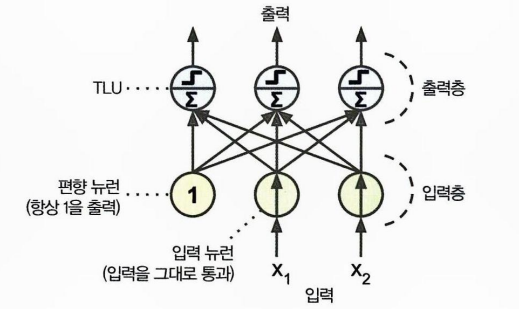

**완전 연결 층의 출력 계산**  

$
h_{W,b}(X) = \phi(XW + b)
$  
- X는 입력 특성의 행렬을 나타낸다. 이 행렬의 행은 샘플, 열은 특성이다.  
- 가중치 행렬 W는 편향 뉴런은 제외한 모든 연결 가중치를 포함한다. 이 행렬의 행은 입력 뉴런에 해당하고 열은 출력층에 있는 인공 뉴런에 해당한다.  
- 편향 벡터 b는 편향 뉴련과 인공 뉴련 사이의 모든 연결 가중치를 포함한다.  
- $\phi$는 활성화 함수

퍼셉트론의 훈련 알고리즘은 `헤브의 규칙`에서 영감을 받았다.  
$\rightarrow$ 두 뉴런이 동시에 활성할될 때마다 이들 사이의 연결 가중치가 증가  
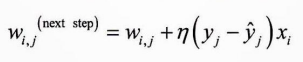
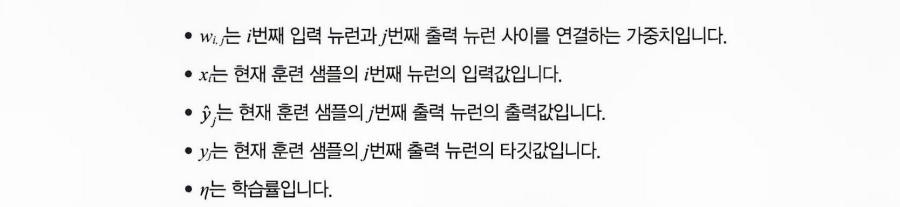

사이킷런은 하나의 TLU 네트워크를 구현한 Perceptron 클래스를 제공  

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # 붓꽃 데이터셋 사용
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int32) # Iris Setosa인가?

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

퍼셉트론은 XOR 분류 문제와 같은 간단한 문제를 풀지 못한다.  
XOR 게이트 : 두 개의 입력 신호가 서로 같으면 출력이 '0', 다르면 '1'로 출력  
   - 하나의 직선으로 좌표 별로 출력값 y를 구분 지을 수 없다?    
   
$\rightarrow$ 다층 퍼셉트론(MLP)은 퍼셉트론은 여러 개 쌓아올려 일부 제약을 줄이면서 XOR 문제 해결 가능

**DNN (Deep Neural Network, 심층 신경망)**  
- 은닉층이 2개이고, 뉴런의 개수를 늘린 다층 퍼셉트론의 모습
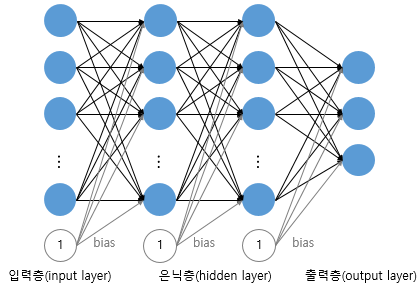

위 그림과 같이 오직 입력층에서 출력층 한 방향으로만 흐르는 구조를 **피드 포워드 신경망(FNN, Feed-Forward Neural Network)** 이라고 부른다.  
이에 속하지 않는 신경망으로는 **RNN** 이 있다.  

**오차 역전파(Back-propagation)**  
- 예측값의 정확도를 높이기 위해 출력값과 실제 예측하고자 하는 값을 비교하여 가중치를 변경하는 작업

1. 순전파  
실제 값과의 오차 계산  
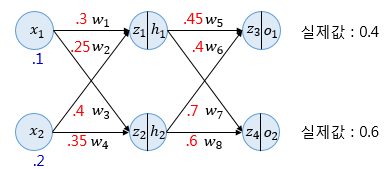    
  
2. 역전파  
반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트  
(오차가 감소해가도록)  
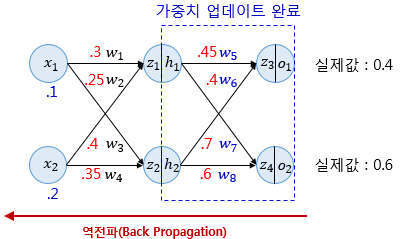

다시 한 번 요약하면,  
1. 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고(정방향 계산) 오차를 측정한다.  
2. 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정한다.(역방향 계산)  
3. 이 오차가 감소하도록 가중치를 조정한다.(경사하강법 단계)

이 알고리즘이 잘 작동하고자 계단 함수를 **시그모이드 함수** 로 바꿈(계단 함수는 수편선밖에 없으니 계산할 그레디언트가 없음)  
이외에도 다양한 활성화 함수가 있다.  

#### 시그모이드 함수  
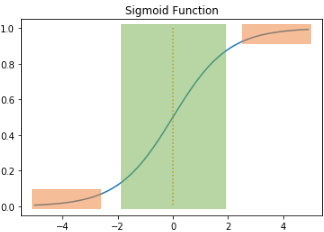  
기울기 소실 문제(Vanishing Gradient)  
주황색 구간에서는 미분값이 0에 가까운 아주 작은 값인 반면,  
초록색 구간에서는 미분값의 최대값은 0.25이다.  
시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 되어 가중치 업데이트가 이루어지지 않아 학습이 되지 않는다.  
따라서 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용한다.

#### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)  
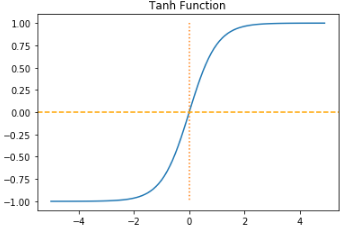  
시그모이드 함수와 비슷하지만, 출력 범위가 -1에서 1 사이이다.  
시그모이드와 달리 0을 중심으로 하고 있으며, 미분하면 최대값은 1로 시그모이드 함수보다 크다.  
따라서 시그모이드 함수보다는 기울기 소실이 적으며 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있어 이는 종종 빠르게 수렴되도록 도와준다.

#### ReLU(렐루 함수)  
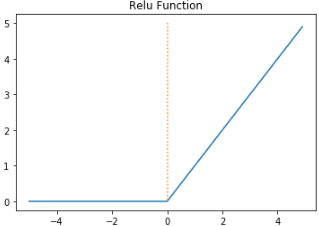  
렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력 값을 그대로 반환한다.  
실제로 깊은 신경망의 은닉층에서 잘 작동하고 단순 임계값이므로 연산 속도도 빠르다.  
또한, 출력에 최대값이 없다는 점이 경사 하강법에 있는 일부 문제를 완화해준다.  

하지만 입력값이 음수면 미분 값이 0이 되는 문제 발생(죽은 렐루)

#### Leaky ReLU(리키 렐루)  
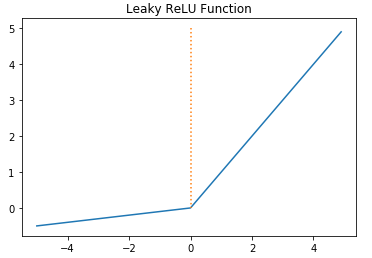  
죽은 렐루를 보완하기 위해 입력값이 음수일 경우에 0이 아니라 매우 작은 수를 반환하도록 한다.  
$f(x) = max(ax,x)$

#### Softmax(소프트맥스 함수)  
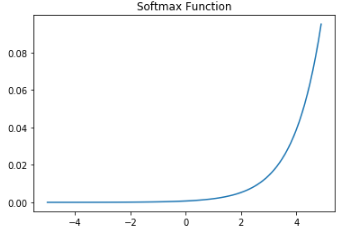
시그모이드 함수처럼 출력층에서 주로 사용된다.  
시그모이드가 이진 분류 문제에 사용된다면, 소프트맥스 함수는 다중 클래스 분류 문제에 주로 사용된다.

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.13.0'

In [6]:
import keras
keras.__version__

'2.13.1'

## 10.2 케라스로 다층 퍼셉트론 구현하기

#### 분류

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

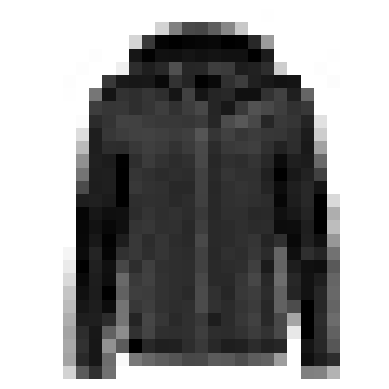

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

데이터 샘플 예시

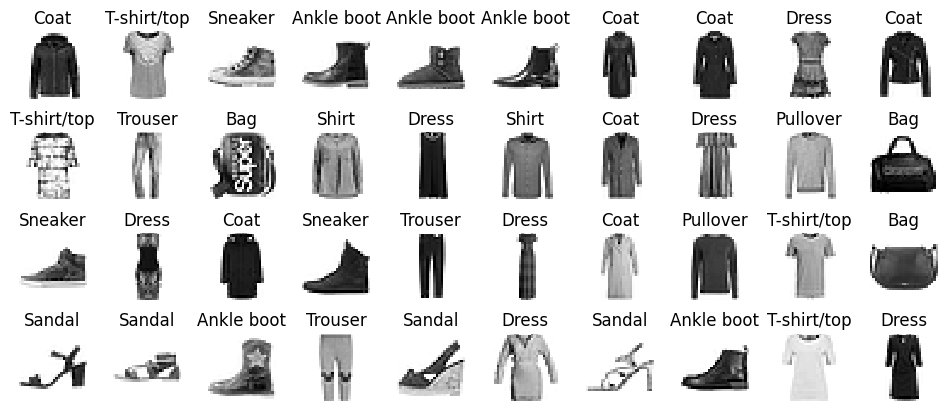

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 시퀀셜 API를 사용하여 모델 만들기

두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론

- 첫 번째 라인은 Sequential 모델을 만든다.  
이 모델은 가장 간단한 케라스의 신경망 모델로, 순서대로 연결된 층을 일렬로 쌓아서 구성한다. 이를 Sequential API라고 부른다.  
- 그 이후 모델을 추가한다. Flatten 층은 입력 이미지를 1D 배열로 변환한다. 즉, 입력 데이터 X를 받으면 X.reshape(-1, 28*28)을 계산한다. 간단한 전처리를 수행하는 단계로, 첫 번째 층이므로 input_shape을 지정해야 한다.  
- 그 이후 뉴런 300개를 가진 Dense 은닉층을 추가한다. 활성화 함수는 ReLU를 사용한다.  
- 그 이후 뉴런 100개를 가진 두 번째 Dense 은닉층을 추가하고 마지막으로 뉴런 10기를 가진 Dense 출력층을 추가한다.

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Keras의 백엔드에서 관리되는 상태를 초기화 한다.  
Keras에서는 그래프와 모델들이 메모리에 계속 남아있을 수 있으며, 이렇게 모아진 상태들은 시스템의 메모리를 차지하고 디버깅을 어렵게 할 수 있다.

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


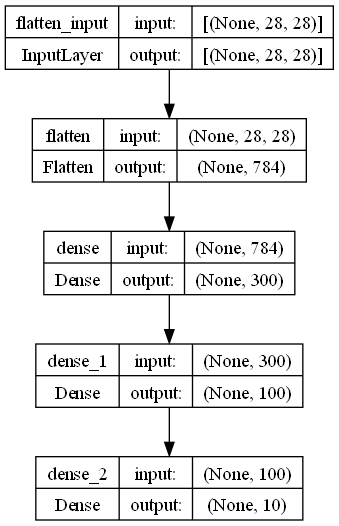

In [20]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

이처럼 모델에 있는 층의 리스트를 출력하거나 인덱소르 층을 쉽게 선택할 수 있고, 이름으로도 층을 선택할 수 있다.

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 3.2883778e-02, -5.0424837e-02, -2.9048540e-02, ...,
        -2.9022038e-02, -2.5178634e-02, -3.1083621e-02],
       [ 1.7182626e-02, -5.2507579e-02,  4.6729170e-02, ...,
         5.4774106e-02,  2.4082705e-02, -5.0496981e-03],
       [-1.0098055e-02, -2.5743097e-03, -2.5156394e-02, ...,
         4.2231187e-02, -6.8595313e-02,  2.7109131e-02],
       ...,
       [-6.7130096e-02,  4.9696118e-04,  6.9249570e-02, ...,
        -1.2619417e-02,  3.6854558e-02, -5.1954165e-03],
       [ 4.7645934e-02, -1.9723572e-02, -3.7323568e-02, ...,
        -3.8509961e-02,  5.9328929e-02,  9.4019473e-03],
       [-5.7304405e-02,  2.0116642e-02, -3.9560255e-02, ...,
        -4.9881637e-05,  3.2741860e-02, -7.2212949e-02]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases.shape

(300,)

#### 모델 compile

모델을 만들고 나서 compile() 메서드를 호출하여 사용할 손실 함수와 optimizer를 지정해야 한다.  
부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있다.

훈련 데이터의 label 값이 원-핫 벡터 형태인 경우 categorical_crossentropy를 사용하고  
훈련 데이터의 label 값이 정수(int) 형태인 경우 sparse_categorical_crossentropy를 사용한다.  
sparse_categorical_crossentropy의 경우 원핫인코딩을 하지 않기 때문에 메모리 소요가 적다.

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

validation 세트를 넣는 것은 선택적인데, 넣게 되면 epoch이 끝날 때마다 검증 세트를 사용해 손실과 추가적인 측정 지표를 계산한다.  
참고로 validation_split=0.1로 지정하면 케라스는 검증에 (섞기 전의) 데이터의 마지막 10%를 사용하여 검증에 사용한다.

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7178 - accuracy: 0.7648 - val_loss: 0.5231 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4898 - accuracy: 0.8283 - val_loss: 0.4383 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8433 - val_loss: 0.5217 - val_accuracy: 0.8050
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8545 - val_loss: 0.3954 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8613 - val_loss: 0.3771 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8675 - val_loss: 0.3735 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8702 - val_loss: 0.3657 - val_accuracy:

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

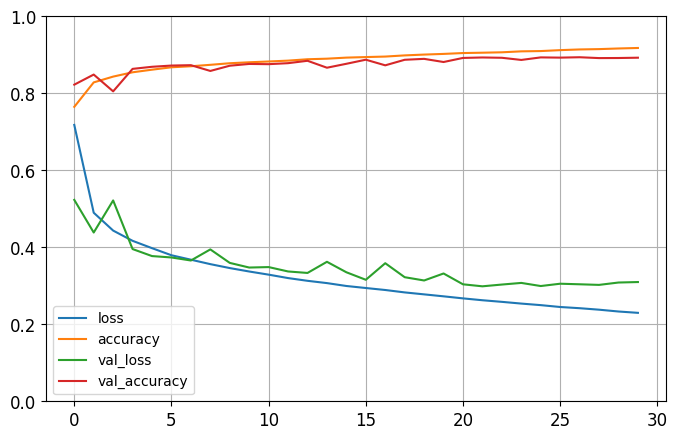

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

일반적으로 충분히 오래 훈련하면 훈련 세트의 성능이 검증 세트의 성능을 앞지른다.  
검증 손실이 여전히 감소한다면 모델이 아직 완전히 수렴되지 않았다고 볼 수 있다.  
$\rightarrow$ keras에서는 fit() 메서드를 다시 호출하면 중지되었던 곳에서부터 훈련을 이어갈 수 있다.  

모델 성능이 만족스럽지 않으면 처음으로 되돌아가서 하이퍼파라미터를 다시 튜닝해야 한다.  
우선 학습률을 확인하고, 다른 optimizer도 테스트해본다. 이외에도 층 개수, 총에 있는 뉴런 개수, 은닉층이 사용하는 활성화 함수, batch_size 등을 튜닝한다.  

모델의 검증 정확도가 만족스럽다면 모델을 테스트 세트로 모델을 평가하여 일반화 오차를 추정해야 한다.  
이 때 evaluate() 메서드를 사용한다.

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8809


[0.34215855598449707, 0.8809000253677368]

#### 모델을 사용하여 예측 만들기

실제로 새로운 샘플이 없기에 테스트 세트의 처음 3개 샘플을 사용한다.

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 105ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

각 샘플에 대해 0부터 9까지 클래스마다 각각의 확률을 모델이 추정했다.

In [32]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 38ms/step


array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### 회귀 MLP(Multi-Layer Perceptron)

캘리포니아 주택 가격 데이터셋으로 회귀 신경망 구현

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

분류와 비슷하지만 주된 차이점은 출력층이 활성화 함수가 없는 하나의 뉴런을 가진다는 것과(하나의 값을 예측해야 하므로) 손실 함수로 평균 제곱 오차를 사용한다는 것이다.

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9870 - val_loss: 1.3348
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8330 - val_loss: 0.7793
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7467 - val_loss: 0.7785
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7024 - val_loss: 0.7007
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6670 - val_loss: 0.6734
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6369
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6060 - val_loss: 0.6351
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5800 - val_loss: 0.5860
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5558 - val_loss: 0.5770
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5339 - val_loss: 0.5619

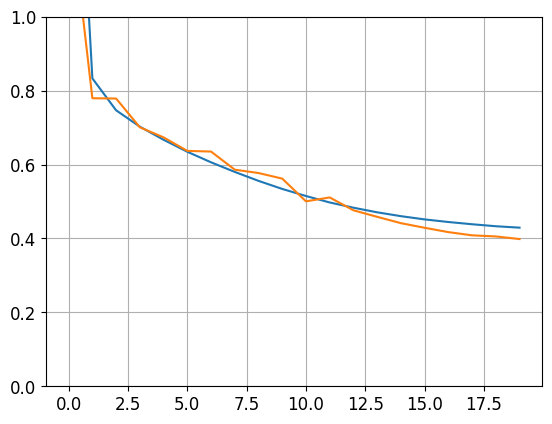

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Sequential API는 사용하기 아주 쉽고 매우 널리 사용되지만, 입력과 출력이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할 때가 있다.  
이를 위해 keras는 `함수형 API(Functional API)`를 제공한다.

만약 와이드나 딥 경로에 다른 입력 특성을 전달하여 (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달한다면,

In [37]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9897 - val_loss: 1.4778
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7491 - val_loss: 0.6530
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6540 - val_loss: 0.6394
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6003 - val_loss: 0.5632
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5616 - val_loss: 0.5128
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 0.4910
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5070 - val_loss: 0.4803
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4885 - val_loss: 0.4476
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4647 - val_loss: 0.4378

여러 개의 출력이 필요한 경우는 많다.  
- 여러 출력이 필요한 작업일 때 (회귀 작업과 분류 작업을 함께 진행)  
- 동일한 데이터에서 독립적인 여러 작업 수행 (다중 작업 분류 : ex.얼굴표정을 분류하고 안경을 썼는지 구별)  
- 규제 기법 사용하는 경우 - 신경망 구조 안에 보조 출력을 추가한다.

규제를 위한 보조 출력 추가

In [39]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [40]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [41]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.2212 - main_output_loss: 2.9253 - aux_output_loss: 5.8836 - val_loss: 2.2290 - val_main_output_loss: 1.9744 - val_aux_output_loss: 4.5208
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2497 - main_output_loss: 0.9816 - aux_output_loss: 3.6626 - val_loss: 1.1903 - val_main_output_loss: 1.0061 - val_aux_output_loss: 2.8483
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9637 - main_output_loss: 0.8008 - aux_output_loss: 2.4296 - val_loss: 0.9121 - val_main_output_loss: 0.7567 - val_aux_output_loss: 2.3111
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8447 - main_output_loss: 0.7271 - aux_output_loss: 1.9037 - val_loss: 0.8214 - val_main_output_loss: 0.6719 - val_aux_output_loss: 2.1667
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7811 - main_output_loss: 0.6803 - aux_output_loss: 1.6885 - val_loss

In [42]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 67ms/step


In [43]:
y_pred_main, y_pred_aux

(array([[0.4168585],
        [1.831357 ],
        [2.9898605]], dtype=float32),
 array([[1.2442043],
        [1.670646 ],
        [2.5874062]], dtype=float32))

시퀄셜 API와 함수형 API는 모두 사용할 층과 연결 방식을 먼저 정의해야 하고 이 후에 모델에 데이터를 주입하여 훈련이나 추론을 시작할 수 있다.  
그러나 어떤 모델은 반복문을 포함하고 다양한 크기를 다루어야 하며 조건문을 가지는 등 여러 가지 동적인 구조를 필요로 한다.  
이럴 경우에 필요한 건 `서브클래싱(Subclassing) API`이다.  

간단히 Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만든다.  
그 후 call() 메서드 안에 수행하려는 연산을 기술한다.  

아래 예제는 함수형 API와 비슷하지만 Input 클래스의 객체를 만들 필요가 없다.  
대신 call() 메서드의 input 매개변수를 사용한다.  

In [44]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [45]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.8126 - output_1_loss: 2.6022 - output_2_loss: 4.7060 - val_loss: 2.3222 - val_output_1_loss: 2.1901 - val_output_2_loss: 3.5112
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0579 - output_1_loss: 0.8477 - output_2_loss: 2.9497 - val_loss: 1.2046 - val_output_1_loss: 1.0572 - val_output_2_loss: 2.5315
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8208 - output_1_loss: 0.6815 - output_2_loss: 2.0748 - val_loss: 0.7879 - val_output_1_loss: 0.6442 - val_output_2_loss: 2.0812
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7398 - output_1_loss: 0.6361 - output_2_loss: 1.6729 - val_loss: 0.7432 - val_output_1_loss: 0.6197 - val_output_2_loss: 1.8544
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6944 - output_1_loss: 0.6079 - output_2_loss: 1.4726 - val_loss: 0.7242 - val_output_1_loss: 0.6149 - val_ou

#### 모델 저장과 복원

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1482 - val_loss: 1.9722
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7939 - val_loss: 0.9717
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6660 - val_loss: 0.6653
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6067 - val_loss: 0.5909
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5657 - val_loss: 0.5265
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5319 - val_loss: 0.4974
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5050 - val_loss: 0.4727
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4828 - val_loss: 0.4534
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4650 - val_loss: 0.4367
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4423


네이티브 Keras 형식은 더 빠르고 파일 크기도 작지만, Keras 내부에서만 사용되며 호환성이 떨어진다.  
반면에 HDF5 파일 형식은 계층적인 구조로 다양한 데이터를 저장하고, 다른 프레임워크에서도 지원되지만, 저장과 로딩에 더 많은 시간이 소요될 수 있습니다.

In [48]:
#model.save("my_keras_model.keras")
model.save("my_keras_model2.h5")

C:\Users\junyoung\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


모델 저장시 HDF 파일의 인코딩 문제가 있어 다른 방법으로 불러옴  

In [50]:
model = keras.models.load_model("my_keras_model2.h5")

In [51]:
model.predict(X_new)

1/1 [==============================] - 0s 108ms/step


array([[0.7617181],
       [1.4768889],
       [3.1611116]], dtype=float32)

In [52]:
model.save_weights("my_keras_weights.ckpt")

In [53]:
model.load_weights("my_keras_weights.ckpt")

#### 콜백 사용하기

훈련이 너무 오래 걸려 중간에 체크포인트를 저장해야 하는 경우가 있다.  
fit() 메서드의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출한 객체 리스트를 지정할 수 있다.  
또는 epoch의 시작이나 끝, 각 배치 처리 전 후에 호출할 수도 있다.  
ModelCheckpoint는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장한다.(기본적으로 매 epoch의 끝에서 호출)  

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

import h5py
from tensorflow import keras

# HDF5 파일 열기
with h5py.File("my_keras_model.h5", "r") as f:
    model = keras.models.load_model(f)
    
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4390 - val_loss: 0.4129
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4297 - val_loss: 0.4060
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4222 - val_loss: 0.3997
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4157 - val_loss: 0.4065
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4107 - val_loss: 0.3956
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4058 - val_loss: 0.3981
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.3951
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3985 - val_loss: 0.3857
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3953 - val_loss: 0.3890
Epoch 10/10
162/162 [==============================] - 1s 2ms/step - loss: 0.3977


0.39768919348716736

**조기종료 (EarlyStopping)**  

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.3953 - val_loss: 0.3873
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3923 - val_loss: 0.3978
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - val_loss: 0.3952
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3871 - val_loss: 0.4037
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3849 - val_loss: 0.3840
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3826 - val_loss: 0.3907
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 0.3882
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3790 - val_loss: 0.3741
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3772 - val_loss: 0.3812
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3755 - val_lo

0.3530867099761963

keras.callbacks 패키지에는 다른 종류의 콜백이 많이 있다.

사용자 정의 콜백을 만들 수도 있다.

In [56]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### 텐서보드를 사용해 시각화

텐서보드는 훌륭한 시각화 도구로 훈련하는 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있다.  
또한 모델이 생성한 이미지를 확인하거나 3D에 투영된 복잡한 다차원 데이터를 시각화하고 자동으로 클러스터링을 해주는 등 많은 기능을 제공한다.  

텐서보드를 사용하려면 프로그램을 수정하여 `이벤트 파일(event file)`이라는 특별한 `이진 로그 파일`에 시각화하려는 데이터를 출력해야 한다.  
각각의 이진 데이터 레코드를 `summary`라고 부른다.

In [57]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [58]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_07_25-19_04_51'

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

케라스는 TensorBoard()를 지원

TensorBoard() 콜백이 로그 디렉터리를 생성한다.  
훈련하는 동안 이벤트 파일을 만들고 서머리를 기록한다.  

In [60]:
import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [61]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [62]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.2438 - val_loss: 1.4080
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8614 - val_loss: 0.7432
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7424 - val_loss: 0.7161
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6810 - val_loss: 0.6751
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6364 - val_loss: 0.6569
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5975 - val_loss: 0.6188
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5650 - val_loss: 0.5911
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5365 - val_loss: 0.5339
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5117 - val_loss: 0.5021
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.4800

----------------------------------

In [66]:
run_logdir

WindowsPath('my_logs/run_2023_07_25_19_05_19')

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [68]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8837 - root_mean_squared_error: 1.3725 - val_loss: 1.2033 - val_root_mean_squared_error: 1.0969
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7526 - root_mean_squared_error: 0.8675 - val_loss: 0.6928 - val_root_mean_squared_error: 0.8323
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6665 - root_mean_squared_error: 0.8164 - val_loss: 0.5999 - val_root_mean_squared_error: 0.7745
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6193 - root_mean_squared_error: 0.7870 - val_loss: 0.5865 - val_root_mean_squared_error: 0.7658
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5834 - root_mean_squared_error: 0.7638 - val_loss: 0.5377 - val_root_mean_squared_error: 0.7333
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5521 - root_mean_squared_error: 0.7430 - val_loss: 0.5034 - val_

-----------------------------------
----------------------------------
-----------------------------------

## 10.3 신경망 하이퍼파라미터 튜닝하기

신경망은 유연하다 -> 조정할 하이퍼파라미터가 많다 -> GridSearchCV, RandomizedSearchCV 사용  


Keras Tuner는 TensorFlow 프로그램에 대한 최적의 하이퍼파라미터 세트를 선택하는 데 도움을 주는 라이브러리

In [69]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [70]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [71]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

  return model

In [72]:
import kerastuner as kt

C:\Users\junyoung\AppData\Local\Temp\ipykernel_15060\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [76]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [77]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [78]:
tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 2 Complete [00h 00m 39s]

Best val_accuracy So Far: None
Total elapsed time: 00h 01m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
160               |320               |units
0.01              |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5306 - accuracy: 0.8104 - val_loss: 0.4791 - val_accuracy: 0.8259
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4359 - accuracy: 0.8441 - val_loss: 0.4935 - val_accuracy: 0.8297


Traceback (most recent call last):
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\tuners\hyperband.py", line 425, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\ker

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\tuners\hyperband.py", line 425, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "C:\Users\junyoung\anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "C:\Users\junyoung\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\junyoung\AppData\Local\Temp\ipykernel_15060\2378868810.py", line 3, in on_train_end
    IPython.display.clear_output(wait = True)
NameError: name 'IPython' is not defined


은닉층, 뉴런 개수, 학습률, 옵티마이저, 배치 크기, 활성화 함수(ReLu), 반복 횟수(조기종료)